In [ ]:
# link for data set https://www.kaggle.com/dell4010/song-lyrics-from-genius
# contains a list of json objects and their lryics
# use 'song' key to get artist and song name
# use 'lyrics' key for lyrics. run lyrics through regex and tokeniser

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving lyrics.jl to lyrics.jl


In [ ]:
import json
import re
import sys
import numpy as np
import fileinput
import pandas as pd
import matplotlib.pyplot as plt
from nltk.sem.logic import Tokens
import nltk
from nltk import tokenize
from operator import itemgetter
import math
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
songDF = pd.DataFrame()
file = open("lyrics.jl", "r")
for line in file:
  obj = json.loads(line)
  songDF = songDF.append(obj, ignore_index=True)

In [ ]:
songDF.head()

,song,lyrics
0,Kendrick-lamar-swimming-pools-drank-lyrics,\n\n[Produced by T-Minus]\n\n[Intro]\nPour up ...
1,Kendrick-lamar-money-trees-lyrics,\n\n[Produced by DJ Dahi]\n\n[Verse 1: Kendric...
2,Kendrick-lamar-xxx-lyrics,"\n\n[Intro: Bēkon & Kid Capri]\nAmerica, God b..."
3,A-ap-rocky-fuckin-problems-lyrics,"\n\n[Chorus: 2 Chainz, Drake & Both (A$AP Rock..."
4,Kendrick-lamar-dna-lyrics,"\n\n[Verse 1]\nI got, I got, I got, I got—\nLo..."


In [ ]:
# tokenize and save to dict

stop_words = set(stopwords.words('english'))

songs= dict()
songTokens = dict()
# list of touples to pull songs (song_name, artist)
#for index,row in songDF.iterrows():
  # This reg ex will remove brackets and everything between them
#  songs['song'] = re.sub("[\(\[].*?[\)\]]",'', row["lyrics"])


def process_lyrics(s):
    # This reg ex will remove brackets and everything between them
  s = re.sub("[\(\[].*?[\)\]]",'', s.lower()) # lower() makes everything lowercase
  s = [word for word in word_tokenize(s) if not word in stop_words]
  s = [word for word in s if word.isalnum()]

  return s

for index, row in songDF.iterrows():
  # This reg ex will remove brackets and everything between them
  songs[row['song']] = process_lyrics(row["lyrics"])


In [ ]:
for i in sorted(list(songs.keys())):
  print(i)

Streaming output truncated to the last 5000 lines.
The-underachievers-moon-shot-lyrics
The-underachievers-my-prism-lyrics
The-underachievers-nasa-lyrics
The-underachievers-never-win-lyrics
The-underachievers-new-new-york-lyrics
The-underachievers-outsiders-lyrics
The-underachievers-packs-lyrics
The-underachievers-philanthropist-lyrics
The-underachievers-phoenix-feathers-lyrics
The-underachievers-play-that-way-lyrics
The-underachievers-play-your-part-lyrics
The-underachievers-potion-number-25-lyrics
The-underachievers-quiescent-lyrics
The-underachievers-radiance-lyrics
The-underachievers-rain-dance-phase-1-intro-lyrics
The-underachievers-really-got-it-lyrics
The-underachievers-reincarnation-phase-2-intro-lyrics
The-underachievers-revelations-lyrics
The-underachievers-root-of-all-evil-lyrics
The-underachievers-saint-paul-lyrics
The-underachievers-shine-all-gold-lyrics
The-underachievers-so-devilish-lyrics
The-underachievers-sonorous-lyrics
The-underachievers-star-signs-lyrics
The-underac

In [ ]:
#Yields either name of artist or name of song if there is only one by said artist
#THis could have been done much better if we tokenized the names
songn=sorted(list(songs.keys()))
artists=set()
curr=-1
for song1 in range(len(songn)):

  if(song1<=curr):
    continue
  first=song1
  tempartist=songn[first]
  #len(songn)
  song2=first+1
  endflag=0
  while(endflag==0 and len(songn)!=song2):
    for i in range(0,min(len(tempartist),len(songn[song2]))):
      if(tempartist[i]!=songn[song2][i]):
        if(tempartist[i-1]=='-' and songn[song2][i-1]=='-' and tempartist.lower()[0:i-1] not in stop_words):
          tempartist=songn[first][0:i-1]
          curr=song2
          #The hardcoded number below signifies at what point to stop the while loop if the 
        if(i<=4):
          endflag=1
        break
    song2+=1
  artists.add(tempartist)
print(len(artists))
print(sorted(artists))
artists = list(artists) # easier to itterate and preform operations


3528
['03-greedo', '044-rosy-and-boulevard-depo-mama-mia-lyrics', '070-shake', '101barz-fresku-studiosessie-272-lyrics', '10kcaash-swajjurkicks-lyrics', '112', '113-on-sait-lfaire-lyrics', '116', '16yrold-up-next-lyrics', '1982-82-92-lyrics', '1995', '1995-temps-perdu-lyrics', '1995-the-motto-remix-lyrics', '1995-tip-lyrics', '1hot-on-my-own-lyrics', '1k-phew-tv-lyrics', '1wayfrank-make-it-happen-lyrics', '2', '2-pistols-i-dont-care-lyrics', '21-savage', '213', '22gz-spin-the-block-lyrics', '24hrs', '24hrs-what-you-like-lyrics', '2am-club-mary-lyrics', '2fingz-one-punch-man-lyrics', '2pac', '2pac-young-niggaz-lyrics', '2zer', '2zer-leffet-pas-dpilon-lyrics', '360-in-da-chub-lyrics', '3oh-3-starstrukk-remix-lyrics', '3rd-bass-the-gas-face-lyrics', '40000-gang-vrai-lyrics', '404billy-rvre-lyrics', '410-pitbulls-lyrics', '485-clout-lyrics', '5', '5-seconds-of-summer', '50-cent', '50-cent-you', '50-cent-you-took-my-heart-lyrics', '50-cent-your-lifes-on-the-line-lyrics', '57th-street-rogue-

In [ ]:
#if string ends in lyrics, we will remove it since it isnt an artist
pruned_artists = []
for entry in artists:
  try:
    if entry[-6:] == 'lyrics':
      # do nothing since this is a song
      pass
    else:
      pruned_artists.append(entry)
  except:
    pass



In [ ]:
common=set()
for i in songs.keys():
  if(len(common)==0):
    common=set(songs[i])
  if(str(i)[0:11]=="Planete-rap"):
    print(len(set(songs[i])))
    common.intersection(set(songs[i]))
print(common)
print(len(common))

1228
958
918
1164
570
535
1291
{'god', 'head', 'turn', 'liquor', 'victory', 'love', 'shots', 'got', 'bang', 'hop', 'straight', 'trust', 'minute', 'bitch', 'livin', 'wake', 'enough', 'damage', 'excuse', 'appetite', 'freedom', 'window', 'niggas', 'feel', 'three', 'pass', 'dave', 'sip', 'brother', 'set', 'wan', 'flask', 'life', 'popular', 'failure', 'sound', '200', 'takin', 'gon', 'capitalize', 'inside', 'nigga', 'someone', 'golden', 'kendrick', 'vow', 'know', 'abusin', 'grow', 'indo', 'blood', 'mind', 'man', 'eyes', 'sit', 'first', 'run', 'make', 'crowd', 'ever', 'bad', 'tell', 'feelin', 'take', 'repeat', 'vibe', 'hear', 'think', 'bottle', 'ways', 'listen', 'poison', 'aha', 'mood', 'another', 'wave', 'leaf', 'parental', 'ai', 'done', 'cup', 'ass', 'release', 'ride', 'homie', 'chicago', 'record', 'new', 'wait', 'see', 'play', 'limit', 'advice', 'bottom', 'pour', 'problem', 'pain', 'one', 'thought', 'took', 'lap', 'shot', 'fillin', 'said', 'lead', 'fall', 'tunes', 'laugh', 'hold', 'ol', 'f

In [ ]:
# build TF matrix with 2d dictionarty
TF = dict()
for s_key in songs:
  temp = dict()
  for word in songs[s_key]:
    try:
      temp[word] += 1
    except:
      # when word is not in dict
      temp[word] = 1
  TF[s_key] = temp

In [ ]:
# Now we compute IDF (will use base 2)
count = dict()
for s_key in songs:
  temp = TF[s_key]
  for temp_key in temp:
    try:
      count[temp_key] += 1 # if the key exists for a document, then it exists in that document 
    except:
      count[temp_key] = 1
# after counting all values we will take the log2(doc count / count[key]) -> log2(doc count) - log2(docs with word)
log_2 = math.log(2)
doc_log = math.log(len(TF)) / log_2
for temp_key in count:
  count[temp_key] = doc_log - math.log(count[temp_key]) / log_2

In [ ]:

TF_IDF = dict()
for k in songs:
  temp_TF_IDF = dict()
  for word in TF[k]:
    temp_TF_IDF[word] =  TF[k][word] * count[word]
    TF_IDF[k] = temp_TF_IDF


In [ ]:
print(TF_IDF['Eminem-lose-yourself-lyrics'])

{'look': 1.7174661054938696, 'one': 11.808836550109039, 'shot': 31.861232446052867, 'opportunity': 61.209628718327515, 'seize': 8.598736169896803, 'everything': 2.6757422661043684, 'ever': 2.420452423009296, 'wanted': 4.025475422027812, 'moment': 37.70880101543045, 'would': 2.1019842741542902, 'capture': 16.147789323226437, 'let': 8.127334473583002, 'slip': 5.791381247839199, 'yo': 19.61515825254027, 'palms': 7.666551554124375, 'sweaty': 9.213446014012012, 'knees': 5.0199206535107965, 'weak': 5.14735682355424, 'arms': 5.317113610102071, 'heavy': 4.880290663701395, 'vomit': 7.8211285912332515, 'sweater': 7.104921557233844, 'already': 3.932675243881409, 'mom': 9.459260473495512, 'spaghetti': 8.343081294428607, 'nervous': 6.227604077008671, 'surface': 7.013773669175649, 'looks': 5.497484023756867, 'calm': 5.898296451755712, 'ready': 3.5190881267905603, 'drop': 2.9655185005684253, 'bombs': 6.842758607204795, 'keeps': 5.685969007951616, 'forgetting': 8.598736169896803, 'wrote': 5.0790196937

In [ ]:
def cosine_dic(dic1,dic2):
    numerator = 0
    dena = 0
    for key1,val1 in dic1.items():
        numerator += val1*dic2.get(key1,0.0)
        dena += val1*val1
    denb = 0
    for val2 in dic2.values():
        denb += val2*val2
    return numerator/math.sqrt(dena*denb)

In [ ]:
print(TF_IDF['Eminem-lose-yourself-lyrics'])

{'look': 1.7174661054938696, 'one': 11.808836550109039, 'shot': 31.861232446052867, 'opportunity': 61.209628718327515, 'seize': 8.598736169896803, 'everything': 2.6757422661043684, 'ever': 2.420452423009296, 'wanted': 4.025475422027812, 'moment': 37.70880101543045, 'would': 2.1019842741542902, 'capture': 16.147789323226437, 'let': 8.127334473583002, 'slip': 5.791381247839199, 'yo': 19.61515825254027, 'palms': 7.666551554124375, 'sweaty': 9.213446014012012, 'knees': 5.0199206535107965, 'weak': 5.14735682355424, 'arms': 5.317113610102071, 'heavy': 4.880290663701395, 'vomit': 7.8211285912332515, 'sweater': 7.104921557233844, 'already': 3.932675243881409, 'mom': 9.459260473495512, 'spaghetti': 8.343081294428607, 'nervous': 6.227604077008671, 'surface': 7.013773669175649, 'looks': 5.497484023756867, 'calm': 5.898296451755712, 'ready': 3.5190881267905603, 'drop': 2.9655185005684253, 'bombs': 6.842758607204795, 'keeps': 5.685969007951616, 'forgetting': 8.598736169896803, 'wrote': 5.0790196937

In [ ]:
# now we have the TF_IDF score of each term in each document
# the count dict also has all terms in the corpus
# will now create a function that:
# 1. takes in a query and ensures it is known to the corpus, otherwise it will be 'dropped' as it will have no impact to query results
# 2. terms not found in a doc, yet in the query will added as a 0 to the document list, so list length is equal. Same is true for thr query
# 3. ranks all 15 docs based on cos() similarity

def search(q_str):
  if len(q_str) == 0:
    return "error, no input"
  q_str = q_str.lower() # works in lowercase to avoid differences just because a word begins a sentence
  s = [word for word in word_tokenize(q_str) if not word in stop_words]
  s = [word for word in s if word.isalnum()]
  q = dict()
  max = 0
  for token in s:
    try:
      q[token] += 1
    except:
      q[token] = 1
    if q[token] > max:
      max = q[token]
  for key in q:
    # use idf values
    try:
      q[key] /= max
      q[key] *= count[key]
    except:
      # key was not in corpus
      print(key, 'not on corpus')
      count[key] = 0 # will hurt cos sim, but not list length
  results = dict()
  for k in TF_IDF:
    c = cosine_dic(TF_IDF[k], q)
    if c > 0:
      results[k] = c
    else:
      pass # ignore docs with no similarity

  return dict(sorted(results.items(), key=lambda item: item[1], reverse = True))

In [ ]:
#Copmputes the average of the maximum cosine similarity for each song of a given artist
def originality(artist, artist_songs):
  scores = 0
  comparisons = 0
  most_similar_songs = (None,None,0) # just a numm value if 0 or 1 song in dataset
  for i in range(len(artist_songs)):
    for j in range(i+1, len(artist_songs)): # avoids comparing the same song
      sim = cosine_dic(TF_IDF[artist_songs[i]], TF_IDF[artist_songs[j]])
      scores += sim
      comparisons += 1
      if sim > most_similar_songs[2]:
        most_similar_songs = (artist_songs[i], artist_songs[j], sim)

  if len(artist_songs) <= 1:
    return "Artist has no songs to compare", most_similar_songs

  return artist, len(artist_songs), scores / comparisons, most_similar_songs


In [ ]:
def compile_artists(d):
  artists = dict()
  split_up = []
  for k in d:
    split_up.append(re.split('-', k))
  
  for l in split_up:
    pattern1 = l[0]
    pattern2 = l[0] + '-' + l[1]
    pattern3 =  l[0] + '-' + l[1] + '-' + l[2]
    count1 = 0
    count2 = 0
    count3 = 0
    if not ((pattern1 in artists.keys()) or (pattern2 in artists.keys()) or (pattern3 in artists.keys())):
      for i in d:
        if pattern1 == i[:len(pattern1)]:
          count1 += 1
        if pattern2 in i[:len(pattern2)]:
          count2 += 1
        if pattern3 in i[:len(pattern3)]:
          count3 += 1

      if count3 <= 2: 
        # the higher the number in the count1 inequality, the greater probability duplicates are removes, at the gost of a greatwer probabiltiy legit artists are removed, if they have few songs
        if count2 <= 2 and count1 > 3: # all this tries to find right artist name length and also remove artists with few songs 
          artists[pattern1] = 1
        else:
          artists[pattern2] = 1
      else:
        artists[pattern3] = 1

    else:
      if pattern3 in artists.keys():
        artists[pattern3] +=1
      elif pattern2 in artists.keys():
        artists[pattern2] +=1
      elif pattern1 in artists.keys():
        artists[pattern1] +=1
  
    
  return dict(sorted(artists.items(), key=lambda item: item[1], reverse = True))

In [ ]:
artists = compile_artists(TF_IDF)

In [ ]:
for k in artists:
  print(k, artists[k])

The 689
Lil-wayne 540
Gucci-mane 396
Drake 388
Young 378
Lil 352
Chief-keef 350
Eminem 349
Wiz-khalifa 329
2pac 322
Chris-brown 306
Tech-n9ne 306
Future 301
Jay-z 301
Bones 295
Kanye-west 281
Rick-ross 270
Migos 248
Meek-mill 246
Uicideboy 246
The-game 245
J-cole 231
Kendrick-lamar 230
Mac-miller 229
Logic 228
Nas 224
Dj 217
Tyga 214
Wale 204
Kevin 203
Lana-del-rey 203
Lupe-fiasco 197
Fabolous 196
Childish 194
50-cent 192
Kodak-black 186
Xxxtentacion 181
Lil-durk 180
French-montana 171
Nicki-minaj 168
Lil-uzi-vert 168
G-eazy 164
Ti 163
Big-krit 160
Tory-lanez 157
2-chainz 156
Tyler-the-creator 156
Frank-ocean 156
Taylor-swift 151
Machine-gun-kelly 149
Booba 149
Beyonce 146
Big-sean 146
Kid-cudi 145
Snoop-dogg 145
Curren-y 145
David-bowie 143
Kid 142
Joe-budden 142
Travis-scott 135
Juicy-j 135
Bob 134
Pharaoh 134
The-weeknd 133
Action-bronson 131
Lil-yachty 130
Green-day 129
Russ 128
Ace 127
Trey-songz 127
Yg 126
Atmosphere 126
Radiohead 124
Lecrae 122
Juice-wrld 119
Vald 119
Brockhampt

In [ ]:
# this will filter 'the and artists with too few songs
pruned_artists = dict()
for k in artists:
  if k == 'The' or artists[k] <= 4:
    pass
  else:
    pruned_artists[k] = artists[k]

# you can manually pop with pruned_artusts.pop("key you want to pop")

# the only errors is when nultiple artists atart with the same prefit and there is at least 1 song 
#i.e, Lil-wayne, lil;-nas-x and more are accounted for but, lil-toe (with 2 songs) gets bubbled into the lil 
pruned_artists.pop("Mr")
pruned_artists.pop("B")
pruned_artists.pop("Cal")
pruned_artists.pop("Lil")
pruned_artists.pop("J")
pruned_artists.pop("Chris")
pruned_artists.pop("La")
pruned_artists.pop("P")
pruned_artists.pop("Don")
pruned_artists.pop("D")
pruned_artists.pop("M")
pruned_artists.pop("Rich") # can manually add 
pruned_artists.pop('G')
pruned_artists.pop('Young')
pruned_artists.pop('Big')
pruned_artists.pop('Jay')
pruned_artists.pop('Da')

pruned_artists.pop('Lil-b-i')
pruned_artists['Lil-b'] = 117
pruned_artists.pop('Charlie')
pruned_artists['Charlie-puth'] = 5
print(pruned_artists)

{'Lil-wayne': 540, 'Gucci-mane': 396, 'Drake': 388, 'Chief-keef': 350, 'Eminem': 349, 'Wiz-khalifa': 329, '2pac': 322, 'Chris-brown': 306, 'Tech-n9ne': 306, 'Future': 301, 'Jay-z': 301, 'Bones': 295, 'Kanye-west': 281, 'Rick-ross': 270, 'Migos': 248, 'Meek-mill': 246, 'Uicideboy': 246, 'The-game': 245, 'J-cole': 231, 'Kendrick-lamar': 230, 'Mac-miller': 229, 'Logic': 228, 'Nas': 224, 'Dj': 217, 'Tyga': 214, 'Wale': 204, 'Kevin': 203, 'Lana-del-rey': 203, 'Lupe-fiasco': 197, 'Fabolous': 196, 'Childish': 194, '50-cent': 192, 'Kodak-black': 186, 'Xxxtentacion': 181, 'Lil-durk': 180, 'French-montana': 171, 'Nicki-minaj': 168, 'Lil-uzi-vert': 168, 'G-eazy': 164, 'Ti': 163, 'Big-krit': 160, 'Tory-lanez': 157, '2-chainz': 156, 'Tyler-the-creator': 156, 'Frank-ocean': 156, 'Taylor-swift': 151, 'Machine-gun-kelly': 149, 'Booba': 149, 'Beyonce': 146, 'Big-sean': 146, 'Kid-cudi': 145, 'Snoop-dogg': 145, 'Curren-y': 145, 'David-bowie': 143, 'Kid': 142, 'Joe-budden': 142, 'Travis-scott': 135, 'Juic

In [ ]:

for k in pruned_artists.keys():
  print(k)

Lil-wayne
Gucci-mane
Drake
Chief-keef
Eminem
Wiz-khalifa
2pac
Chris-brown
Tech-n9ne
Future
Jay-z
Bones
Kanye-west
Rick-ross
Migos
Meek-mill
Uicideboy
The-game
J-cole
Kendrick-lamar
Mac-miller
Logic
Nas
Dj
Tyga
Wale
Kevin
Lana-del-rey
Lupe-fiasco
Fabolous
Childish
50-cent
Kodak-black
Xxxtentacion
Lil-durk
French-montana
Nicki-minaj
Lil-uzi-vert
G-eazy
Ti
Big-krit
Tory-lanez
2-chainz
Tyler-the-creator
Frank-ocean
Taylor-swift
Machine-gun-kelly
Booba
Beyonce
Big-sean
Kid-cudi
Snoop-dogg
Curren-y
David-bowie
Kid
Joe-budden
Travis-scott
Juicy-j
Bob
Pharaoh
The-weeknd
Action-bronson
Lil-yachty
Green-day
Russ
Ace
Trey-songz
Yg
Atmosphere
Radiohead
Lecrae
Juice-wrld
Vald
Brockhampton
A-ap-rocky
Pink-floyd
Ice-cube
Bts
Yelawolf
Fall-out-boy
Gorillaz
Hopsin
Justin-bieber
Ab-soul
Red-hot
Chance-the-rapper
Common
Ed-sheeran
Joey-bada
Yung-lean
Playboi-carti
Marilyn-manson
Rich-homie-quan
Arctic-monkeys
Coldplay
Schoolboy-q
Partynextdoor
Queen
Death-grips
Ty-dolla-sign
Jaden
Nekfeu
Ski-mask-the
Aes

In [ ]:
# this will put songs by artists in their own list
# the key, the artist name, maps to a list of their songs
# I know it is not efficient but i dont want to figure out linear time with regexes and handling similar prefixes like 'Lil'
songs_organised_By_artists = dict()
for k in TF_IDF:
  for artist in pruned_artists:
    if k[:len(artist)] == artist:
      try:
        songs_organised_By_artists[artist].append(k)
      except:
        # then list is empty
        songs_organised_By_artists[artist] = [k]

In [ ]:

print(len(songs_organised_By_artists))
for k in songs_organised_By_artists:
  print(k , len(songs_organised_By_artists[k]))

714
Kendrick-lamar 230
A-ap-rocky 116
Travis-scott 135
Lil-wayne 540
Kanye-west 291
Kanye-west-all 7
Ti 296
Sia 62
The-weeknd 133
J-cole 231
Taylor-swift 151
Rich-the-kid 92
Chris-brown 306
Jhene-aiko 83
Tech-n9ne 306
Black 155
Black-hippy 11
Beyonce 146
Future 301
Pusha-t 81
Imagine-dragons 81
The-game 259
The-game-the 14
Jay-rock 52
Ab-soul 110
Rick-ross 270
Sza 48
50-cent 192
Khalid 47
Dr-dre 72
Fredo-santana 17
Danny-brown 88
Robin-thicke 13
Miguel 15
Mike-will-made 42
Mike 64
Mac-miller 229
Alicia-keys 40
Jid 38
Meek-mill 246
Kid-cudi 145
Kid 298
Yg 129
Jeezy 60
Vince-staples 92
Vince-staples-and 11
Nipsey-hussle 93
Schoolboy-q 100
Mozzy 7
The-lonely-island 12
A-tribe-called 79
Dj 258
Sir 13
Birdman 43
Dom-kennedy 11
Nerd 36
Nerd-and 5
Bet 12
Trae-tha-truth 16
Talib-kweli 46
Ty-dolla-sign 98
Rapsody 20
Rich-gang 19
Tyga 214
Big-sean 146
Dreamville 12
Flying-lotus 11
2-chainz 156
Thundercat 22
Skrillex 21
Bj-the-chicago 9
Snoop-dogg 145
Xxl-xxl-freshmen 16
Xv 7
Dj-drama 23
Terrace-

In [ ]:
# might be able to optimize if all songs belinging to an artist are saved to a list, rather than itterating 
t = []
i = len(songs_organised_By_artists)
for k in songs_organised_By_artists: # will need to make edits to possibly rank most similar songs, or remove/ignore remixest
  i -= 1
  print(str(i) + " artists left")
  temp = originality(k, songs_organised_By_artists[k])
  t.append(temp)
  print(temp)

713 artists left
('Kendrick-lamar', 230, 0.03332099844799768, ('Kendrick-lamar-bitch-dont-kill-my-vibe-lyrics', 'Kendrick-lamar-bitch-dont-kill-my-vibe-international-remix-lyrics', 0.9784218074749307))
712 artists left
('A-ap-rocky', 116, 0.032599674706012806, ('A-ap-rocky-a-ap-forever-lyrics', 'A-ap-rocky-a-ap-forever-remix-lyrics', 0.9119143168896258))
711 artists left
('Travis-scott', 135, 0.023860098743583157, ('Travis-scott-sdp-interlude-lyrics', 'Travis-scott-sdp-interlude-demo-lyrics', 0.942236021845809))
710 artists left
('Lil-wayne', 540, 0.04375119476981591, ('Lil-wayne-i-dont-like-lyrics', 'Lil-wayne-dont-like-lyrics', 0.9675678134261578))
709 artists left
('Kanye-west', 291, 0.027967387927980893, ('Kanye-west-famous-lyrics', 'Kanye-west-famous-original-version-lyrics', 0.9910252640007353))
708 artists left
('Kanye-west-all', 7, 0.1251577772583691, ('Kanye-west-all-falls-down-lyrics', 'Kanye-west-all-falls-down-original-lyrics', 0.8548058587799813))
707 artists left
('Ti', 2

In [ ]:
print(t[0])

('Kendrick-lamar', 230, 0.03332099844799768, ('Kendrick-lamar-bitch-dont-kill-my-vibe-lyrics', 'Kendrick-lamar-bitch-dont-kill-my-vibe-international-remix-lyrics', 0.9784218074749307))


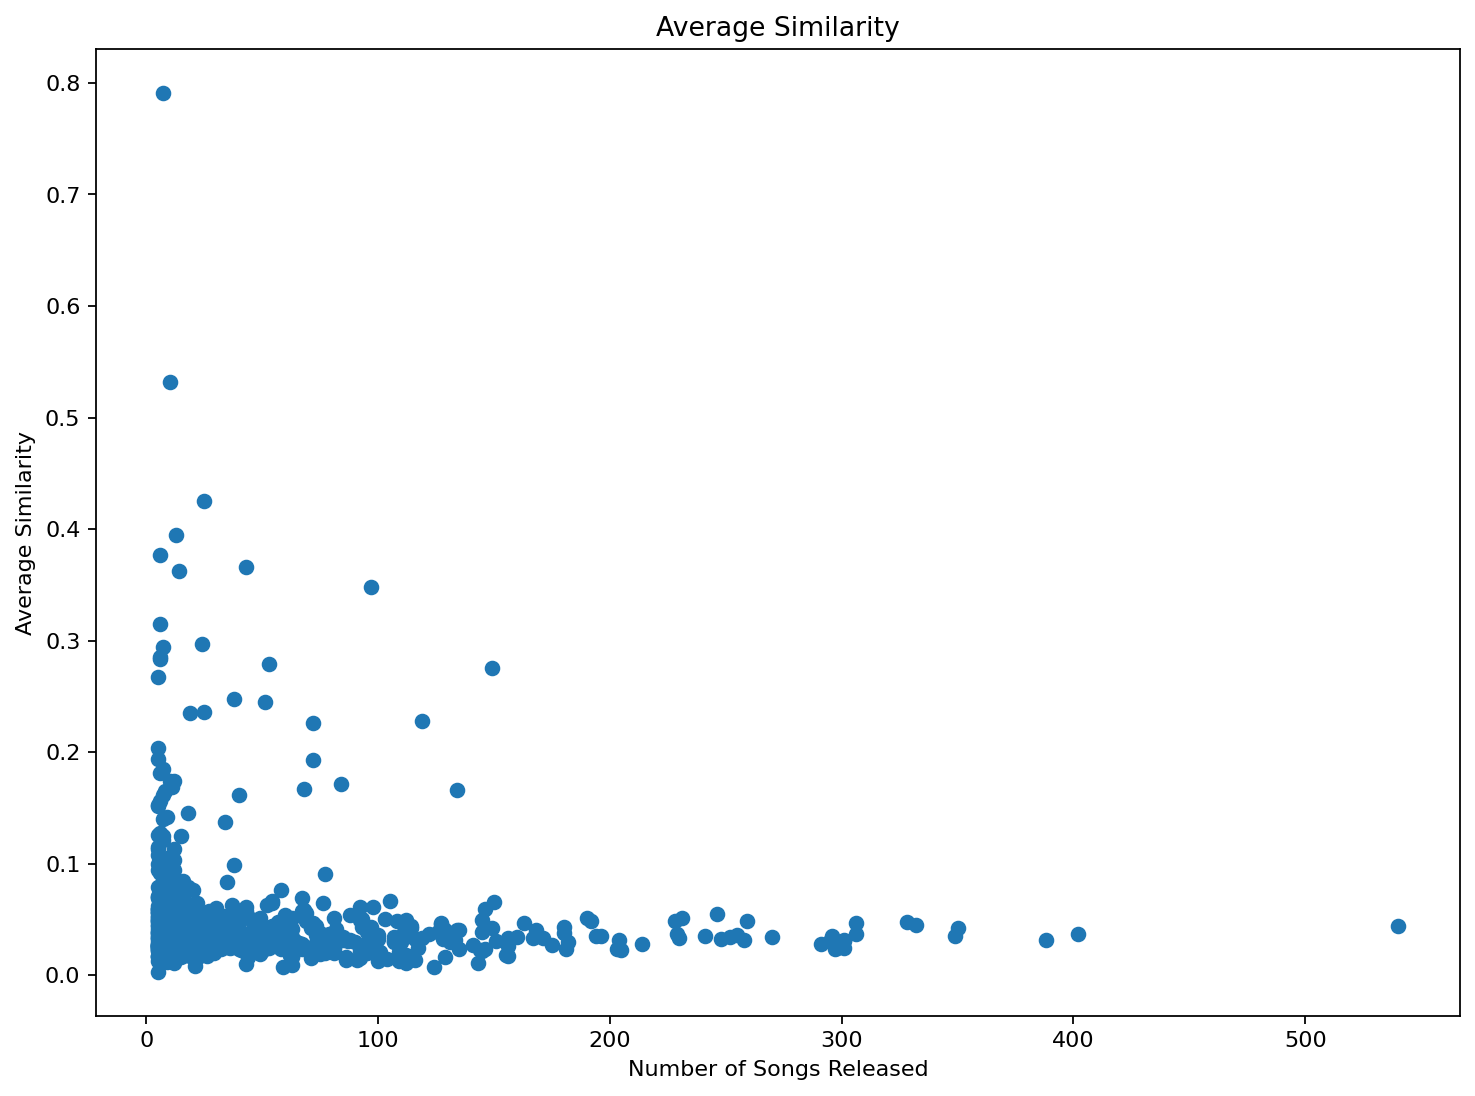

In [ ]:
#Bar chart foundation if we want to use above function for multiple authors
# this will have all authors
plt.figure(figsize=(11, 8), dpi=160)
artist_names, x, y, most_similar_songs = zip(*t)
plt.scatter(x, y)
for i, txt in enumerate(artist_names):
    plt.annotate(artist_names[i], (x[i], y[i]))

plt.title('Average Similarity')
plt.xlabel('Number of Songs Released')
plt.ylabel('Average Similarity')
plt.show()

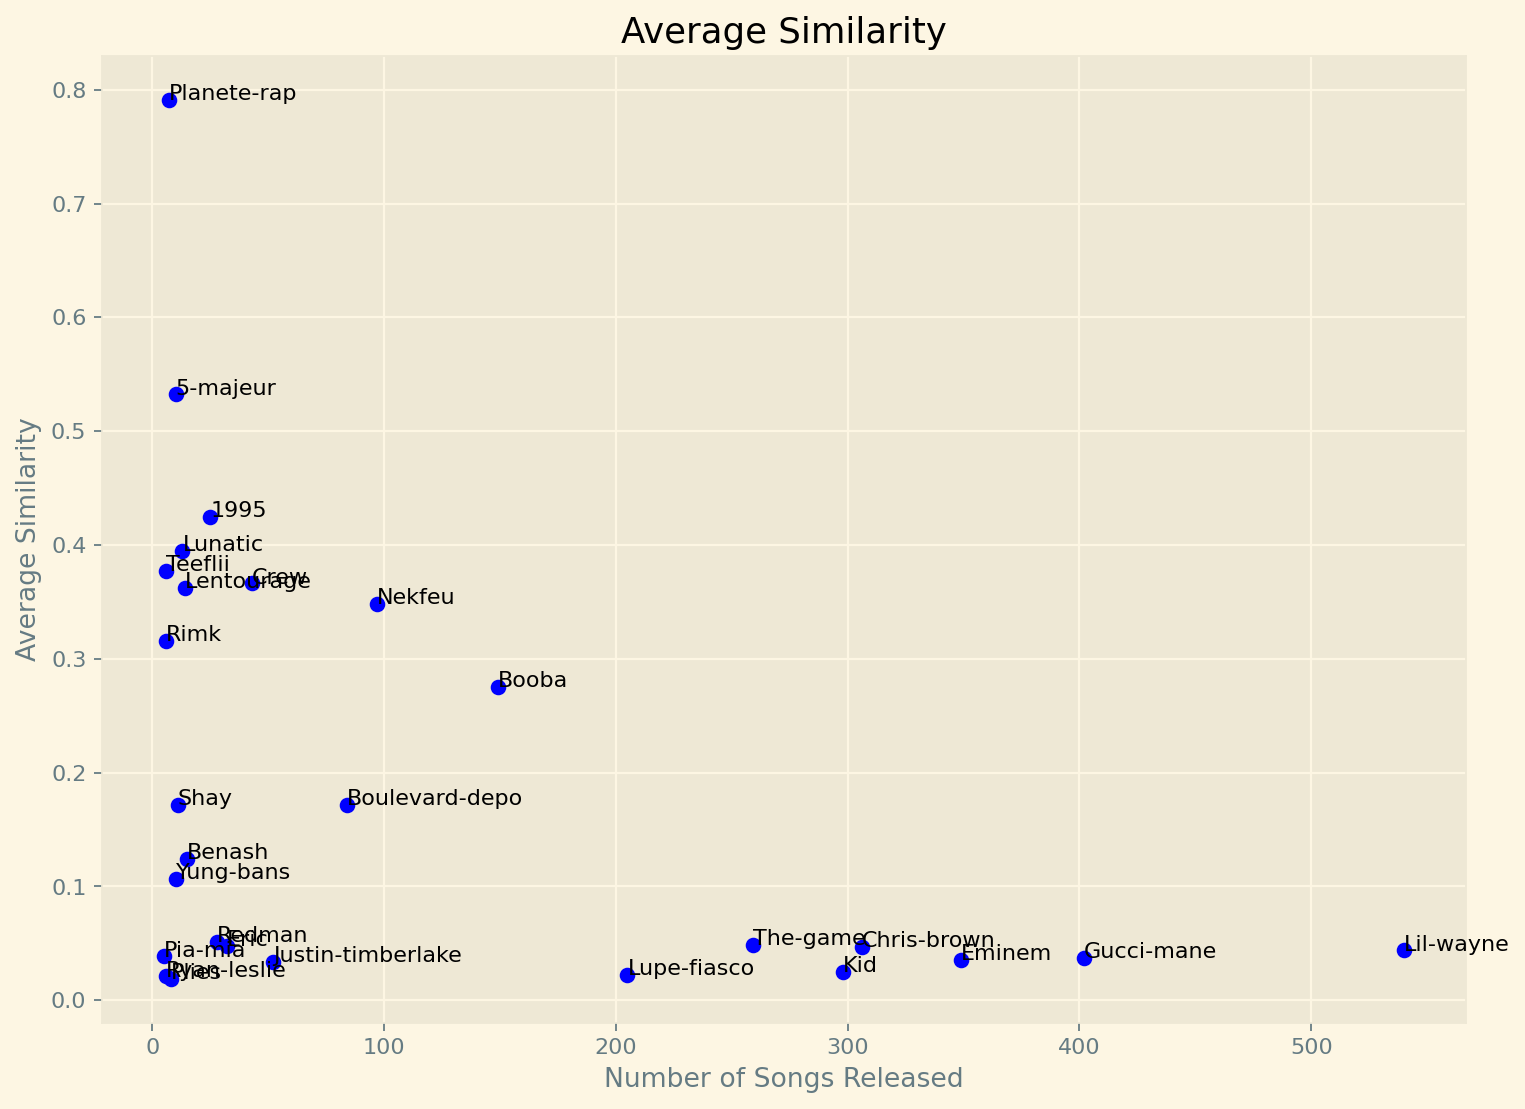

In [ ]:
#Bar chart foundation if we want to use above function for multiple authors
# randomly prints artists to help explore 
import random as r
plt.figure(figsize=(11, 8), dpi=160)
artist_names, x, y, most_similar_songs = zip(*t)
for i in range(len(x)):
  if x[i] >=400 or y[i] >= .3:
    plt.scatter(x[i], y[i], color = "blue")
    plt.annotate(artist_names[i], (x[i], y[i]))
  elif x[i] >=200 or y[i] >= .1:
    rand = r.randint(0,100)
    if rand > 85:
      plt.scatter(x[i], y[i], color = "blue")
      plt.annotate(artist_names[i], (x[i], y[i]))
  else:
    rand = r.randint(0,100)
    if rand > 99:
      plt.scatter(x[i], y[i], color = "blue")
      plt.annotate(artist_names[i], (x[i], y[i]))

plt.title('Average Similarity')
plt.xlabel('Number of Songs Released')
plt.ylabel('Average Similarity')
plt.show()

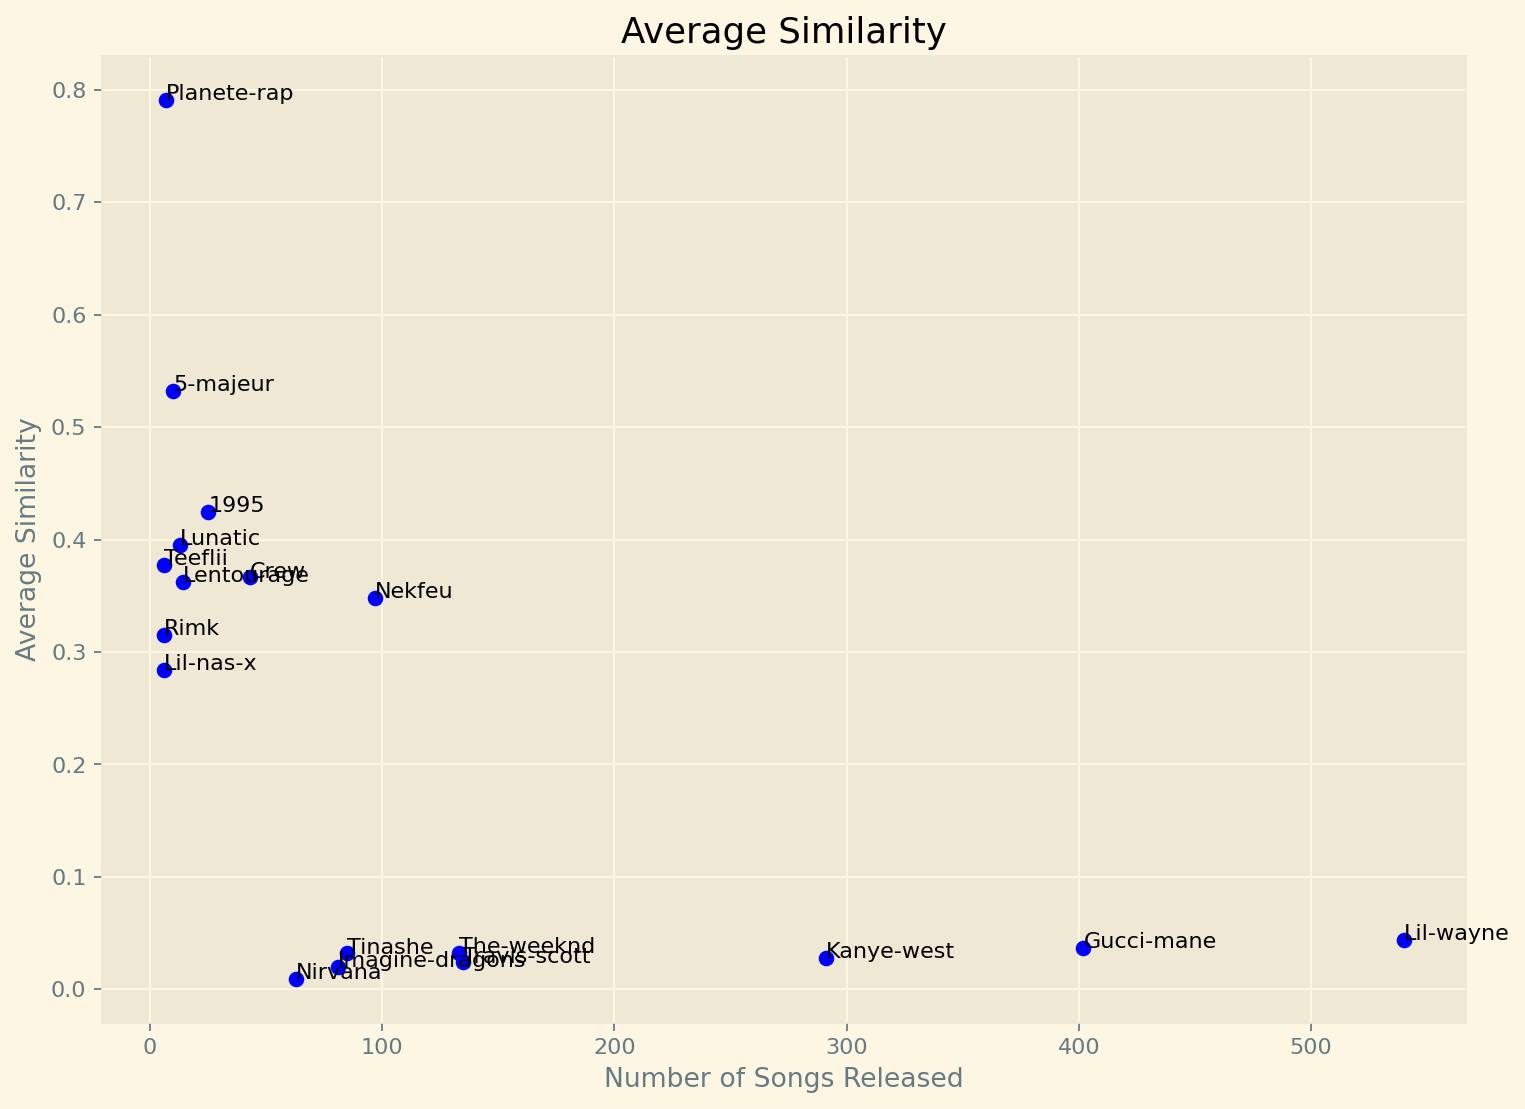

In [ ]:
#Bar chart foundation if we want to use above function for multiple authors
# prints data points form a manually compiled list 
import random as r
plt.figure(figsize=(11, 8), dpi=160)
artist_names, x, y, most_similar_songs = zip(*t)
# feel free to add or remove names as you wist
artists_to_plot = ["Nirvana","Lil-nas-x","Travis-scott","Kanye-west",'The-weeknd',"Imagine-dragons","Tinashe"]
for i in range(len(x)):
  if x[i] >=400 or y[i] >= .3:
    plt.scatter(x[i], y[i], color = "blue")
    plt.annotate(artist_names[i], (x[i], y[i]))
  else:
   if artist_names[i] in artists_to_plot:
      plt.scatter(x[i], y[i], color = "blue")
      plt.annotate(artist_names[i], (x[i], y[i]))

plt.title('Average Similarity')
plt.xlabel('Number of Songs Released')
plt.ylabel('Average Similarity')
plt.show()

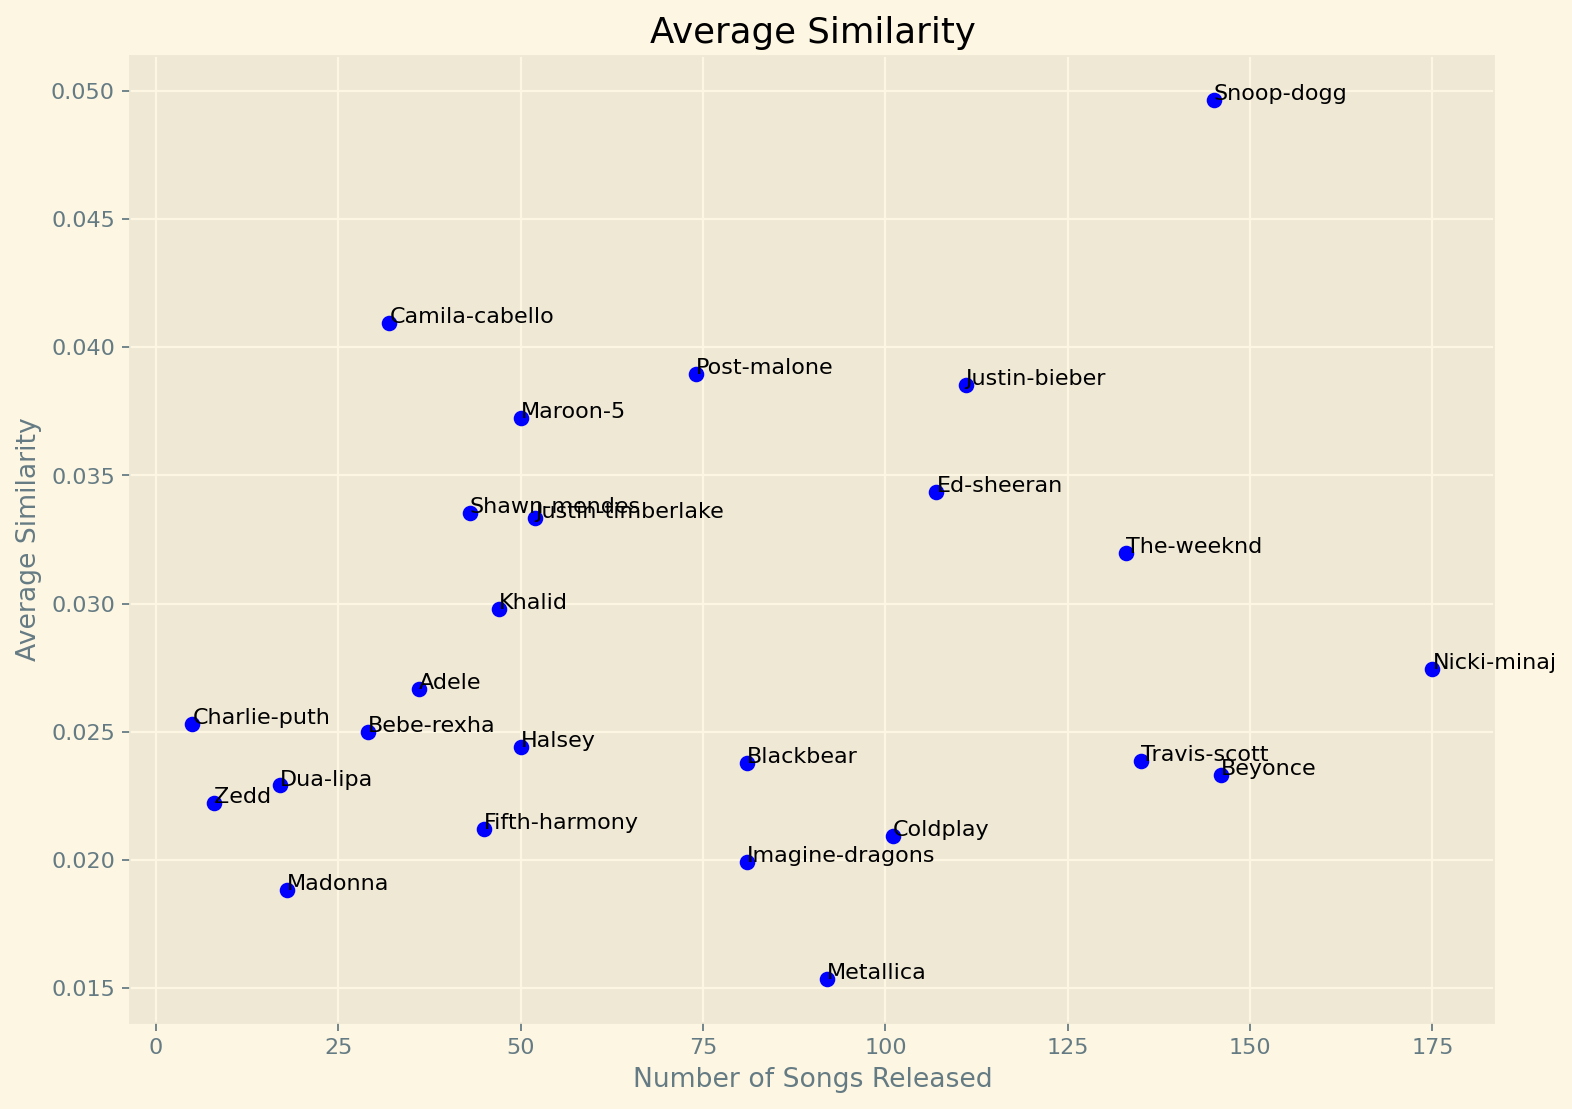

In [ ]:
#Bar chart foundation if we want to use above function for multiple authors
# Zoomed on more compact data
import random as r
plt.figure(figsize=(11, 8), dpi=160)
artist_names, x, y, most_similar_songs = zip(*t)
# feel free to add or remove names as you wish
artists_to_plot = ["Camila-cabello", "Shawn-mendes","Travis-scott",'The-weeknd',"Imagine-dragons",
                   'Blackbear', 'Beyonce','Khalid','Snoop-dogg',"Maroon-5", "Lada-gaga", 'Nicki-minaj','Ed-sheeran',
                   'Justin-timberlake', 'Justin-bieber','Post-malone','Madonna', 'Zedd', 'Coldplay', 'Halsey',
                   'Bebe-rexha','Charlie-puth','Fifth-harmony','Dua-lipa','Adele','Metallica']
for i in range(len(x)):
  if artist_names[i] in artists_to_plot:
      plt.scatter(x[i], y[i], color = "blue")
      plt.annotate(artist_names[i], (x[i], y[i]))

plt.title('Average Similarity')
plt.xlabel('Number of Songs Released')
plt.ylabel('Average Similarity')
plt.show()

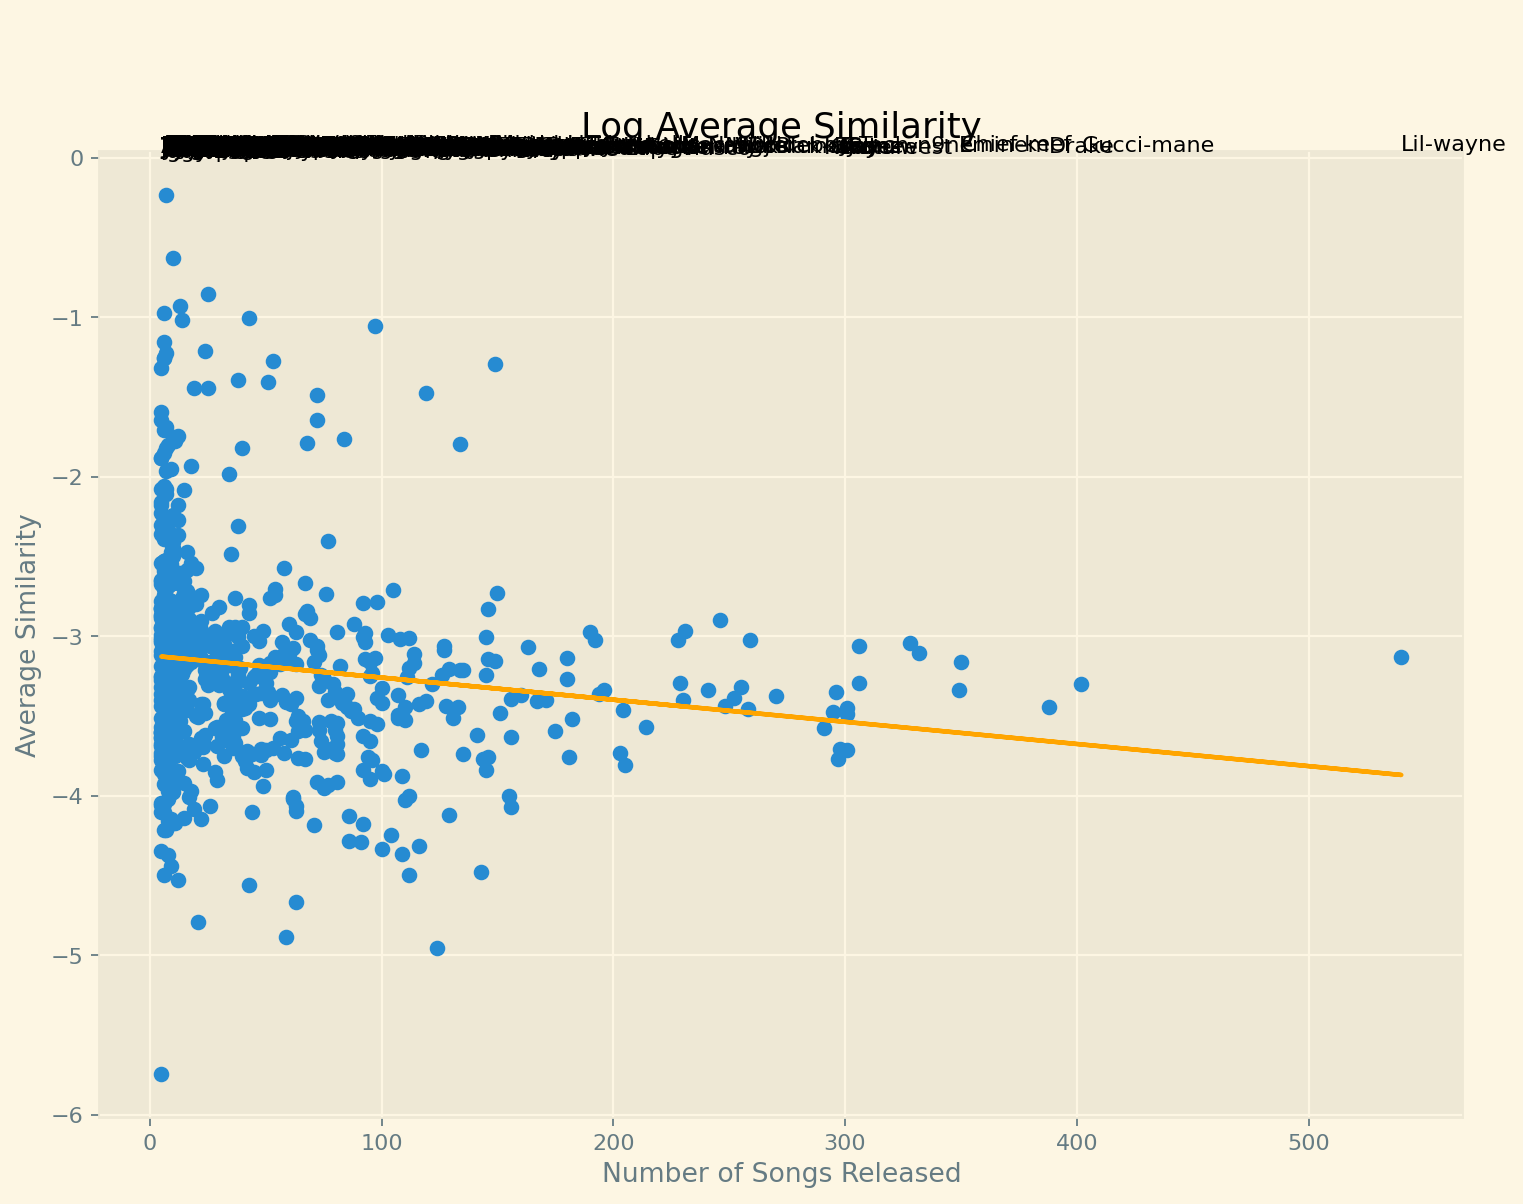

In [ ]:
# this is for correlation matching
plt.figure(figsize=(11, 8), dpi=160)
plt.title('Log Average Similarity')
plt.xlabel('Number of Songs Released')
plt.ylabel('Average Similarity')
x = np.array(x)
y = np.array(y)
plt.scatter(x, np.log(y))
for i, txt in enumerate(artist_names):
    plt.annotate(artist_names[i], (x[i], y[i]))
m, b = np.polyfit(x, np.log(y), 1)
plt.style.use('Solarize_Light2')
plt.plot(x, m*x + b, color="orange")
plt.show()

In [ ]:
correlation_matrix = np.corrcoef(x, y)

correlation_xy = correlation_matrix[0,1]

r_squared = correlation_xy**2


print(correlation_xy)

-0.11863512405781303
